In [1]:
import matplotlib.pyplot as plt
from math import acos, pi
from classifier import *
from convex_hull import *
from primitives import *
import random

In [2]:
def plotCH(cl,test,l1):
    ch = cl.ch1
    ch2 = cl.ch2
    coord = ch.hull
    coord2 =ch2.hull
    coord2.append(coord2[0])
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs = list(map( lambda pt : pt.x, coord)) #create lists of x and y values
    ys = list(map( lambda pt : pt.y, coord))
    xs2 = list(map( lambda pt : pt.x, coord2)) #create lists of x and y values
    ys2 = list(map( lambda pt : pt.y, coord2))
    #print('Interpect' if(not areIndependent(ch,ch2)) else 'Dont Intercept')
    plt.figure()

    plt.scatter(list(map( lambda pt : pt.x, ch2.all_points)), list(map( lambda pt : pt.y, ch2.all_points)),alpha=0.3)
    plt.scatter(list(map( lambda pt : pt.x, ch.all_points)), list(map( lambda pt : pt.y, ch.all_points)),alpha=0.3)
    plt.plot(xs2,ys2)
    plt.plot(xs,ys) 
    if(cl.hasClassifier):
        print("CHEGOU AQUI")
        p,q = cl.p,cl.q
        qp = distP2P(q,p)
        """ pr = distP2P(r,p)
        rq = distP2P(q,r)
        theta = acos((qp**2+pr**2-rq**2)/(2*qp*pr)) * (180/pi) """
        #print(theta)
        lx = [p.x,q.x]
        ly = [p.y,q.y]
        plt.plot(lx,ly)
        """ lx = [r.x,s.x]
        ly = [r.y,s.y] """
        plt.plot(lx,ly)
        plt.plot([cl.r.x,cl.s.x],[cl.r.y,cl.s.y])
    for pt in test:
        color = 'red' if(pt.label == l1) else 'purple'
        plt.scatter(pt.x,pt.y,color=color,alpha=0.3)
    plt.show()

In [3]:
def sample(dataSet,l1,l2,trainTax=0.7,seed = 679):
    random.seed = 7
    #print("SEED:",random.seed)
    random.shuffle(dataSet)
    trainSize = int(trainTax*len(dataSet))
    train,test = [],[]
    points1,points2 = [],[]
    train,test = dataSet[:trainSize],dataSet[trainSize:]


    for pt in train:
        if(pt.label == l1):
            points1.append(pt)
        elif(pt.label == l2):
            points2.append(pt)


    cl = Classifier(points1,points2,l1,l2)
    print(len(cl.ch1.hull))
    print(len(cl.ch2.hull))

    if cl.hasClassifier:
        for pt in test:
            cl.classify(pt)
        cl.printMetrics()

    #print("TP: ",cl.trueL1,"TN: ",cl.trueL2,"FP: ",cl.falseL1, "FN: ",cl.falseL2)
    plotCH(cl,test,l1)
    return cl.hasClassifier

In [4]:
fileName = 'Iris.csv'
l1 = 'Iris-setosa'
l2 = 'Iris-versicolor'
f = open(fileName, "r",encoding='utf-8-sig')
points1 = []
points2 = []

dataSet1 = []
dataSet2 = []
dataSet3 = []
for line in f:
    id,sepalLen,sepalWid,petalLen,petalWid,label = line.rstrip('\n').split(',')
    dataSet1.append(Point(float(petalWid),float(petalLen),label))
    dataSet2.append(Point(float(sepalWid),float(sepalLen),label))

    dataSet3.append(Point(float(petalWid),float(sepalWid),label))

Pi:  0.14142135623730942
P2:  0.3605551275463988
Pi:  0.36055512754639896
P2:  0.14142135623730942
Pi:  0.14142135623730956
P2:  0.36055512754639896
Pi:  0.36055512754639896
P2:  0.5385164807134504
Pi:  0.2236067977499789
P2:  0.10000000000000003
Pi:  0.36055512754639896
P2:  0.2236067977499789
Pi:  0.19999999999999996
P2:  0.36055512754639896
Pi:  0.5999999999999999
P2:  0.19999999999999996
Pi:  0.49999999999999994
P2:  0.3605551275463988
Pi:  0.282842712474619
P2:  0.49999999999999994
Pi:  0.5
P2:  0.30000000000000004
Pi:  0.22360679774997894
P2:  0.5
Pi:  0.316227766016838
P2:  0.22360679774997894
Pi:  0.3999999999999999
P2:  0.316227766016838
Pi:  0.42426406871192873
P2:  1.0295630140987004
Pi:  1.140175425099138
P2:  0.9219544457292886
Pi:  0.9486832980505138
P2:  1.140175425099138
Pi:  1.2999999999999998
P2:  0.9486832980505138
Pi:  1.2206555615733703
P2:  0.9433981132056602
Pi:  0.22360679774997877
P2:  1.2206555615733703
Pi:  0.3162277660168379
P2:  0.22360679774997877
Pi:  0.4

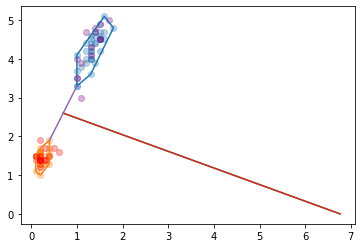

True

In [5]:
sample(dataSet1,l1,l2)

Pi:  0.42426406871192857
P2:  1.7804493814764852
Pi:  0.36055512754639873
P2:  0.42426406871192857
Pi:  0.5385164807134502
P2:  0.36055512754639873
Pi:  0.30000000000000027
P2:  0.5385164807134502
Pi:  0.14142135623730995
P2:  0.30000000000000027
Pi:  0.3605551275463989
P2:  1.0295630140987004
Pi:  1.4212670403551895
P2:  0.3605551275463989
Pi:  0.49999999999999983
P2:  1.4212670403551895
Pi:  0.22360679774997938
P2:  0.49999999999999983
Pi:  0.6708203932499369
P2:  0.22360679774997938
Pi:  0.8246211251235328
P2:  0.6324555320336764
Pi:  0.7810249675906655
P2:  0.8246211251235328
Pi:  0.7280109889280516
P2:  0.41231056256176546
Pi:  0.31622776601683794
P2:  0.7280109889280516
Pi:  0.5830951894845304
P2:  0.31622776601683794
Pi:  1.1180339887498953
P2:  1.7691806012954132
Pi:  1.0440306508910553
P2:  1.1180339887498953
Pi:  0.6000000000000005
P2:  1.0440306508910553
Pi:  0.4123105625617663
P2:  0.6000000000000005
Pi:  0.8485281374238568
P2:  1.360147050873544
Pi:  0.7211102550927977
P2:

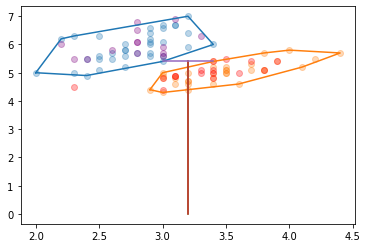

True

In [6]:
sample(dataSet2,l1,l2)

Pi:  0.14142135623730956
P2:  0.14142135623730956
Pi:  0.5385164807134504
P2:  0.8000000000000003
Pi:  0.7211102550927979
P2:  0.5385164807134504
Pi:  0.14142135623730956
P2:  0.7211102550927979
Pi:  0.41231056256176596
P2:  1.1180339887498945
Pi:  0.5830951894845301
P2:  0.41231056256176596
Pi:  0.3605551275463988
P2:  0.5830951894845301
Pi:  0.14142135623730956
P2:  0.4999999999999999
Pi:  0.761577310586391
P2:  0.14142135623730956
Pi:  0.5099019513592785
P2:  0.761577310586391
Pi:  0.22360679774997913
P2:  0.5099019513592785
Pi:  0.6403124237432849
P2:  0.4999999999999999
Pi:  0.36055512754639873
P2:  0.6403124237432849
Pi:  0.4472135954999578
P2:  0.36055512754639873
Pi:  0.44721359549995787
P2:  0.7280109889280516
Pi:  0.22360679774997902
P2:  0.44721359549995787
Pi:  0.36055512754639885
P2:  0.22360679774997902
Pi:  0.6082762530298216
P2:  0.5099019513592781
Pi:  1.2041594578792292
P2:  0.6082762530298216
Pi:  0.9999999999999996
P2:  1.2041594578792292
Pi:  1.0999999999999996
P2:

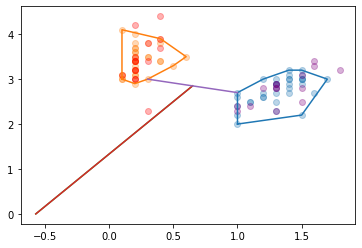

True

In [7]:
sample(dataSet3,l1,l2)

In [8]:
""" cl = Classifier(cv1,cv2)
cl.separatingAxis()
plotCH(cl)
cl.classify(Point(200,200)) """

' cl = Classifier(cv1,cv2)\ncl.separatingAxis()\nplotCH(cl)\ncl.classify(Point(200,200)) '

Pi:  5.0
P2:  5.0
Pi:  5.0
P2:  7.0710678118654755
Pi:  5.0
P2:  7.0710678118654755
0 0
LEN 5
Pi:  2.23606797749979
P2:  1.4142135623730951
AQUI
5 0
LEN 5
Pi:  4.123105625617661
P2:  1.0
Pi:  3.1622776601683795
P2:  4.123105625617661
Pi:  3.605551275463989
P2:  3.1622776601683795
Pi:  1.0
P2:  4.47213595499958
AQUI
5 5
LEN 5
Pi:  5.0
P2:  1.0
Pi:  5.0
P2:  5.656854249492381
Pi:  1.0
P2:  5.0
AQUI
0 5
LEN 5
Pi:  3.605551275463989
P2:  1.0
AQUI
1 1
LEN 5
Pi:  5.0
P2:  4.123105625617661
AQUI
1 1
Nao foi possivel criar o classificador, os dados nao sao independentes.
4
4


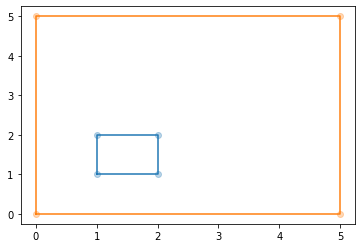

False

In [9]:
ABACATE = [Point(5,0,"A"),Point(0,0,"A"),Point(0,5,"A"),Point(5,5,"A"),Point(1,1,"B"),Point(2,1,"B"),Point(1,2,"B"),Point(2,2,"B")]
sample(ABACATE,"A","B",1)

In [10]:
def tests(n,s):
    pts = []
    for i in range(n):
        pts = []
        A = random.randint(5,s-5)
        B = s - A
        pa = []
        pb = []
        cord = []
        cord2 = []
        print(A)
        print(B)
        for j in range(A):
            p = Point(random.randint(0,int(3*s)),random.randint(0,int(3*s)),"A")
            pts.append(p)
            pa.append(p)
        for i in range(B):
            p = Point(random.randint(int(2.8*s),int(5*s)),random.randint(int(2.8*s),5*s),"B")
            pts.append(p)
            pb.append(p)
        print("AAAAA",len(pa))
        print("BBBBB",len(pb))
        chA = Convex_hull(pa,"A")
        chB = Convex_hull(pb,"B")
        plt.figure()
        cord,cord2 = chA.hull.copy(),chB.hull.copy()
        cord.append(cord[0])
        cord2.append(cord2[0])
        xs = list(map( lambda pt : pt.x, cord)) #create lists of x and y values
        ys = list(map( lambda pt : pt.y, cord))
        xs2 = list(map( lambda pt : pt.x, cord2)) #create lists of x and y values
        ys2 = list(map( lambda pt : pt.y, cord2))
        plt.plot(xs,ys)
        plt.plot(xs2,ys2)
        plt.show()
        print("PE",len(pts))
        sample(pts,"A","B")
        
    


314
686
AAAAA 314
BBBBB 686
Pi:  1930.0259065618782
P2:  1615.33154491578
Pi:  2588.622027256973
P2:  1930.0259065618782
Pi:  1401.1031368175577
P2:  2588.622027256973
Pi:  1440.4599959735085
P2:  1401.1031368175577
Pi:  1472.0410999696985
P2:  1440.4599959735085
Pi:  1643.909973204129
P2:  1472.0410999696985
Pi:  1634.9097834437225
P2:  1643.909973204129
Pi:  1353.4526220004896
P2:  1634.9097834437225
Pi:  1258.4069294151236
P2:  1353.4526220004896
Pi:  282.207370562854
P2:  1067.2267800238149
Pi:  423.7027259765979
P2:  282.207370562854
Pi:  381.69359439215117
P2:  423.7027259765979
Pi:  95.04735661763561
P2:  381.69359439215117
Pi:  2322.643752278855
P2:  1963.6896394287974
Pi:  2520.187691423002
P2:  2322.643752278855
Pi:  224.50167037240502
P2:  2520.187691423002
Pi:  342.6047285137787
P2:  224.50167037240502
Pi:  288.7351727794866
P2:  342.6047285137787
Pi:  2434.9804927350033
P2:  3051.787672823914
Pi:  2528.440230656046
P2:  2434.9804927350033
Pi:  1724.2644808729315
P2:  2528.

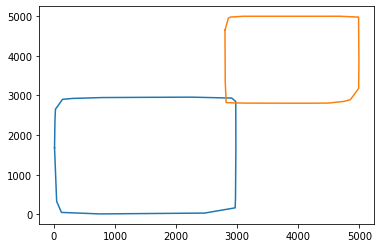

PE 1000
Pi:  1564.059461785261
P2:  2092.9722883975314
Pi:  1387.8865227388007
P2:  1564.059461785261
Pi:  1914.144456408659
P2:  1387.8865227388007
Pi:  1164.5621494793654
P2:  1914.144456408659
Pi:  1472.0410999696985
P2:  1164.5621494793654
Pi:  1634.9097834437225
P2:  1472.0410999696985
Pi:  978.5233773395503
P2:  1634.9097834437225
Pi:  1353.4526220004896
P2:  978.5233773395503
Pi:  1258.4069294151236
P2:  1353.4526220004896
Pi:  1460.1267068306092
P2:  1694.4344189138747
Pi:  1321.712903772979
P2:  1460.1267068306092
Pi:  986.4709828474429
P2:  1321.712903772979
Pi:  1558.621185535472
P2:  986.4709828474429
Pi:  282.207370562854
P2:  1558.621185535472
Pi:  381.69359439215117
P2:  282.207370562854
Pi:  95.04735661763561
P2:  381.69359439215117
Pi:  1495.0826064134383
P2:  3660.3958802293505
Pi:  1315.0060836361176
P2:  1495.0826064134383
Pi:  975.5926403986451
P2:  1315.0060836361176
Pi:  1536.378208645254
P2:  975.5926403986451
Pi:  224.50167037240502
P2:  1536.378208645254
Pi:  

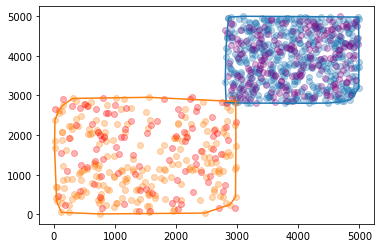

In [11]:
tests(10,100)
